## Linear Regression


In [232]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# importing data set

In [235]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing    

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [237]:
dataset = pd.DataFrame(housing.data)
dataset

,0,1,2,3,4,5,6,7
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [239]:
dataset.columns = housing.feature_names
# price = pd.DataFrame(housing.target)
# price.columns = ['price']
price


,price
0,4.526
1,3.585
2,3.521
3,3.413
4,3.422
...,...
20635,0.781
20636,0.771
20637,0.923
20638,0.847


In [241]:
# dataset = pd.concat([dataset,price],axis=1)
dataset

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [243]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


              MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  \
MedInc      1.000000 -0.119034  0.326895  -0.062040    0.004834  0.018766   
HouseAge   -0.119034  1.000000 -0.153277  -0.077747   -0.296244  0.013191   
AveRooms    0.326895 -0.153277  1.000000   0.847621   -0.072213 -0.004852   
AveBedrms  -0.062040 -0.077747  0.847621   1.000000   -0.066197 -0.006181   
Population  0.004834 -0.296244 -0.072213  -0.066197    1.000000  0.069863   
AveOccup    0.018766  0.013191 -0.004852  -0.006181    0.069863  1.000000   
Latitude   -0.079809  0.011173  0.106389   0.069721   -0.108785  0.002366   
Longitude  -0.015176 -0.108197 -0.027540   0.013344    0.099773  0.002476   

            Latitude  Longitude  
MedInc     -0.079809  -0.015176  
HouseAge    0.011173  -0.108197  
AveRooms    0.106389  -0.027540  
AveBedrms   0.069721   0.013344  
Population -0.108785   0.099773  
AveOccup    0.002366   0.002476  
Latitude    1.000000  -0.924664  
Longitude  -0.924664   1.000000  


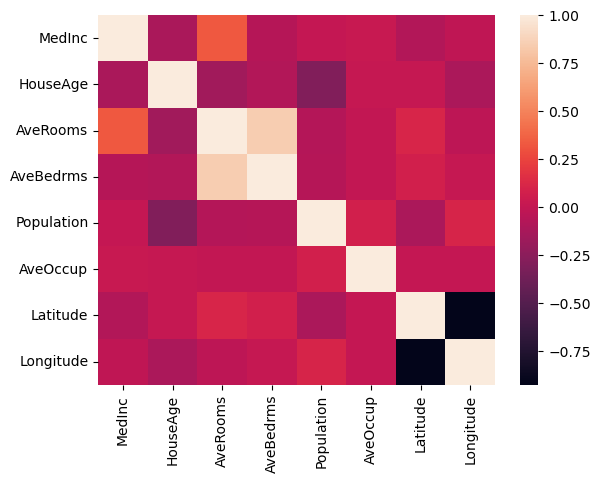

In [245]:
sns.heatmap(dataset.corr())
print(dataset.corr())

# partitioning independent and dependent features

In [248]:
X = dataset
y = housing.target

In [250]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [252]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

## train_test_split

In [255]:
from sklearn.model_selection import train_test_split

In [257]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)

In [259]:
X_test

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
12484,0.9196,52.0,1.550409,1.103542,509.0,1.386921,38.58,-121.49
11186,6.3214,34.0,6.294872,0.948718,498.0,3.192308,33.83,-117.96
5684,3.7282,8.0,5.572549,1.023529,1624.0,3.184314,33.68,-118.28
888,8.3996,15.0,7.946779,1.047619,2412.0,3.378151,37.56,-121.94
8162,3.7321,36.0,5.937500,1.017857,273.0,2.437500,33.82,-118.13
...,...,...,...,...,...,...,...,...
12091,2.3229,16.0,5.205357,1.044643,2372.0,3.529762,33.85,-117.28
18051,8.2069,17.0,7.203571,1.091071,1158.0,2.067857,37.26,-121.99
3694,3.0125,23.0,3.874532,1.096442,3911.0,3.661985,34.20,-118.38
7402,0.9166,42.0,5.035714,1.235714,739.0,5.278571,33.95,-118.23


In [261]:
X_train

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18822,2.0650,26.0,10.583333,2.055556,498.0,2.305556,39.52,-120.51
14057,3.0000,50.0,4.169492,1.000000,698.0,1.971751,32.75,-117.13
17117,2.3769,36.0,4.897155,1.048140,1949.0,4.264770,37.48,-122.16
9386,8.4888,30.0,5.954114,1.134494,1292.0,2.044304,37.90,-122.45
448,2.5430,46.0,4.477037,1.031111,1293.0,1.915556,37.87,-122.28
...,...,...,...,...,...,...,...,...
14144,3.5078,33.0,4.894895,1.010511,1784.0,2.678679,32.74,-117.08
10587,3.7988,14.0,4.180473,1.100592,744.0,2.201183,33.69,-117.77
9553,2.5670,21.0,5.091935,1.027419,2268.0,3.658065,37.38,-120.64
2611,3.2891,28.0,5.781818,1.177273,519.0,2.359091,40.93,-123.88


<Axes: >

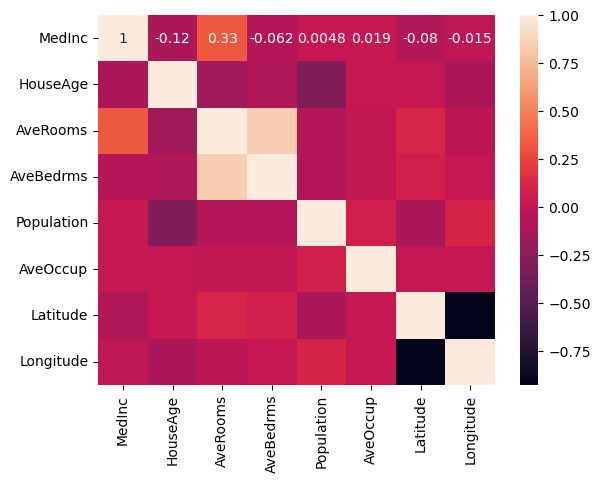

In [263]:
sns.heatmap(dataset.corr(),annot=True)

# Standardizing the dataset

In [266]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()

In [268]:
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.95654799, -0.20941291,  2.02712114, ..., -0.06861157,
         1.81905752, -0.46951301],
       [-0.46449337,  1.70006513, -0.49928759, ..., -0.09771813,
        -1.34817982,  1.21665659],
       [-0.79240699,  0.58620294, -0.21266121, ...,  0.10222514,
         0.86467581, -1.29264313],
       ...,
       [-0.69236465, -0.60722084, -0.13593743, ...,  0.04932251,
         0.81789239, -0.53436568],
       [-0.31235113, -0.05028974,  0.13580698, ..., -0.06394347,
         2.4787037 , -2.15069394],
       [-0.42376072,  1.8591883 , -0.17294492, ...,  0.04960379,
         0.99566938, -1.41735982]])

In [270]:
X_test = scaler.transform(X_test)
X_test

array([[-1.55932805,  1.8591883 , -1.53094286, ..., -0.14871331,
         1.3792934 , -0.95840242],
       [ 1.283432  ,  0.42707977,  0.33789852, ...,  0.00871014,
        -0.84291892,  0.80259719],
       [-0.08126965, -1.64152145,  0.05337598, ...,  0.00801309,
        -0.91309404,  0.64295984],
       ...,
       [-0.4579151 , -0.44809767, -0.61547205, ...,  0.04966437,
        -0.66982027,  0.59307316],
       [-1.56090684,  1.06357245, -0.15808293, ...,  0.19062509,
        -0.78677881,  0.66790317],
       [ 0.46009568, -0.76634401,  0.10429267, ...,  0.13113998,
         0.62140204, -1.08810777]])

# prforming cross validation and linear Regression

In [273]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


In [275]:
reg = LinearRegression()
mean_square_error = cross_val_score(reg,X_train,y_train,scoring='neg_mean_squared_error',cv=5)
mean_square_error

array([-0.55778008, -0.50787302, -0.50762166, -0.52188301, -0.56165991])

In [277]:
np.mean(mean_square_error)

-0.5313635354028137

In [279]:
reg.fit(X_train, y_train)
reg_predict = reg.predict(X_test)

In [281]:
import seaborn as sns

C:\Users\odins\AppData\Local\Temp\ipykernel_19716\3895636646.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(reg_predict - y_test)
d:\Users\odins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

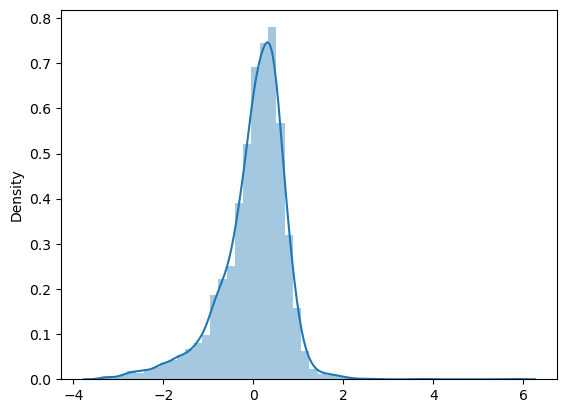

In [283]:
sns.distplot(reg_predict - y_test)

In [341]:
from sklearn.metrics import r2_score
r2_score(y_test,reg_predict)

0.6079562044266333

## Ridge regression to overcome overfitting

In [307]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [311]:
ridge_regressor = Ridge()
parameters = {'alpha':[1,2,5,7,10,15,20,25,30,40,50,60,70,80,90,]}


In [319]:
ridgecv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

In [325]:
ridgecv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 7, 10, 15, 20, 25, 30, 40, 50, 60,
                                   70, 80, 90]},
             scoring='neg_mean_squared_error')

In [329]:
print(ridgecv.best_params_)
print(ridgecv.best_score_)

{'alpha': 50}
-0.5310041312061555


In [331]:
ridge_predict = ridgecv.predict(X_test)

C:\Users\odins\AppData\Local\Temp\ipykernel_19716\2035335287.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(ridge_predict-y_test)
d:\Users\odins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

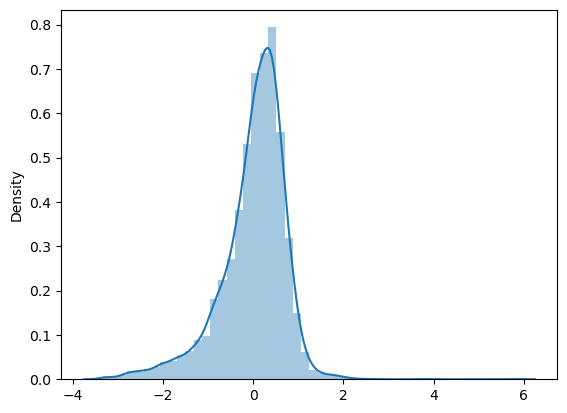

In [333]:
sns.distplot(ridge_predict-y_test)

In [349]:
from sklearn.metrics import r2_score
score = r2_score(y_test,ridge_predict)
score

0.6073395593085348

# Lasso Regreesion

In [355]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [359]:
Lasso_regressor = Lasso()
parameters = {'alpha':[1,2,5,7,10,15,20,25,30,40,50,60,70,80,90,]}

In [361]:
Lasso_cv = GridSearchCV(ridge_regressor,parameters,scoring='neg_mean_squared_error',cv=5)

In [363]:
Lasso_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 7, 10, 15, 20, 25, 30, 40, 50, 60,
                                   70, 80, 90]},
             scoring='neg_mean_squared_error')

In [369]:
print(Lasso_cv.best_params_)
print(Lasso_cv.best_score_)

{'alpha': 50}
-0.5310041312061555


In [373]:
Lasso_predict = Lasso_cv.predict(X_test)

C:\Users\odins\AppData\Local\Temp\ipykernel_19716\4170732574.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(Lasso_predict-y_test)
d:\Users\odins\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: ylabel='Density'>

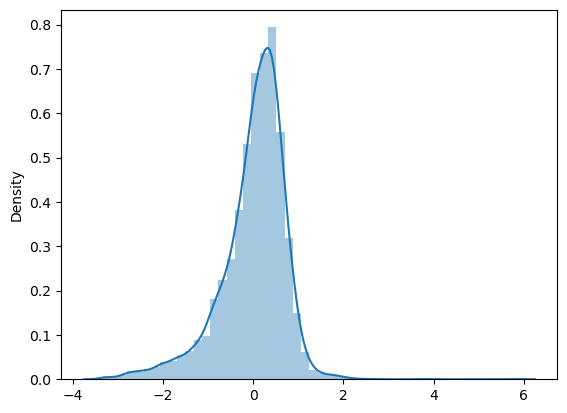

In [379]:
sns.distplot(Lasso_predict-y_test)

In [381]:
from sklearn.metrics import r2_score
r2_score(y_test,Lasso_predict)

0.6073395593085348